In [17]:
import sys
print(sys.version)
import numpy as np
import ROOT
from array import *
import matplotlib.pyplot as plt
import time
import dunestyle.matplotlib as dunestyle

3.12.3 (main, Jan 22 2026, 20:57:42) [GCC 13.3.0]


In [18]:
#path = '/media/leoperes/Acer/Users/le0_p/'
#path='~/Dropbox/BoostedDM/ntuples2023/'
path = '~/'

In [19]:
fAtm = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
fAtm_allevts = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/atm_hA_BR.root')



fBDM_m05_b1p1 = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_m05_b1p1_00a.root')
fBDM_m10_b1p1 = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_m10_b1p1_00a.root')
fBDM_m20_b1p1 = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_m20_b1p1_00a.root')
fBDM_m40_b1p1 = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_m40_b1p1_00a.root')

fTree_atm = fAtm.Get("ana/Atm")
fTree_atm_allevts = fAtm_allevts.Get("ana/Atm")
fTree_m05_b1p1 = fBDM_m05_b1p1.Get("ana/Atm")
fTree_m10_b1p1 = fBDM_m10_b1p1.Get("ana/Atm")
fTree_m20_b1p1 = fBDM_m20_b1p1.Get("ana/Atm")
fTree_m40_b1p1 = fBDM_m40_b1p1.Get("ana/Atm")

nSimulatedEvtsReco_atm = fTree_atm.GetEntries()
nSimulatedEvtsReco_m05_b1p1 = fTree_m05_b1p1.GetEntries()
nSimulatedEvtsReco_m10_b1p1 = fTree_m10_b1p1.GetEntries()
nSimulatedEvtsReco_m20_b1p1 = fTree_m20_b1p1.GetEntries()
nSimulatedEvtsReco_m40_b1p1 = fTree_m40_b1p1.GetEntries()

In [20]:

def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result


def GetBDTResponse(tree,xml_file, cvn_var = False):
    
    bdtOutput = []
    # in order to start TMVA
    ROOT.TMVA.Tools.Instance()
    reader = ROOT.TMVA.Reader("!Color:!Silent")
    
    event = array('f', [0])
    LongestTrack= array('f',[0])
    HighestTrackSummedADC= array('f',[0])
    PIDALongestTrack= array('f',[0])
    nTracks= array('f',[0])
    nShowers= array('f',[0])
    TotalMomentumP= array('f',[0])
    nSpacePoints= array('f',[0])
    NHits = array('f', [0])
    #NPrimaryDaughters= array('f',[0])
    HighestShowerSummedADC= array('f',[0])
    #PrimaryPDGReco= array('f',[0])
    LargeShowerOpenAngle= array('f',[0])
    LongestShower= array('f',[0])
    CosThetaDetTotalMom= array('f',[0])
    CosPhiDetTotalMom= array('f',[0])
    FracTotalChargeLongTrack= array('f',[0])
    AvarageTrackLength= array('f',[0])
    CVN_NCScore= array('f',[0])
    EventRecoEnergy_Charge = array('f',[0])
    EventRecoEnergy_numu = array('f',[0])
    EventRecoEnergy_nue = array('f',[0])
    #event = array('f',[0])
    
    #reader.AddSpectator("event", event)
    #reader.AddVariable("LongestTrack", LongestTrack)
    ##reader.AddVariable("log(HighestTrackSummedADC)", HighestTrackSummedADC)
    #reader.AddVariable("PIDALongestTrack", PIDALongestTrack)
    #reader.AddVariable("nTracks", nTracks)
    #reader.AddVariable("nShowers", nShowers)
    ##reader.AddVariable("TotalMomentumP", TotalMomentumP)
    #reader.AddVariable("NHits", NHits)
    ##reader.AddVariable("NPrimaryDaughters", NPrimaryDaughters)
    #reader.AddVariable("log(HighestShowerSummedADC)", HighestShowerSummedADC)
    ##reader.AddVariable("PrimaryPDGReco", PrimaryPDGReco)
    #reader.AddVariable("LargeShowerOpenAngle", LargeShowerOpenAngle)
    #reader.AddVariable("LongestShower", LongestShower)
    ##reader.AddVariable("CosThetaDetTotalMom", CosThetaDetTotalMom)
    ##reader.AddVariable("CosPhiDetTotalMom", CosPhiDetTotalMom)
    #reader.AddVariable("FracTotalChargeLongTrack", FracTotalChargeLongTrack)
    ##reader.AddVariable("AvarageTrackLength", AvarageTrackLength)
    #reader.AddVariable("CVN_NCScore", CVN_NCScore)
    ##reader.AddVariable("EventRecoEnergy_Charge", EventRecoEnergy_Charge)
    ##reader.AddVariable("EventRecoEnergy_numu", EventRecoEnergy_numu)
    ##reader.AddVariable("EventRecoEnergy_nue", EventRecoEnergy_nue)
    ##reader.AddSpectator("event", event)
    if cvn_var:
        reader.AddSpectator("event", event)
    reader.AddVariable("PIDALongestTrack", PIDALongestTrack) # PIDA of the longest track
    reader.AddVariable("nTracks", nTracks) # Number of tracks
    reader.AddVariable("nShowers", nShowers) # Number of showers
    reader.AddVariable("NHits", NHits) # Number of 3D space points
    reader.AddVariable("log(HighestShowerSummedADC)", HighestShowerSummedADC) # Highest Shower ADC
    reader.AddVariable("LargeShowerOpenAngle", LargeShowerOpenAngle) # Large shower opening angle
    reader.AddVariable("LongestShower", LongestShower) # Longest shower in event
    if cvn_var:    
        reader.AddVariable("CVN_NCScore",CVN_NCScore) # CVN score for NC
    reader.AddVariable("LongestTrack", LongestTrack)
    reader.AddVariable("FracTotalChargeLongTrack", FracTotalChargeLongTrack)

    
    bdt_class_xml = xml_file 
    reader.BookMVA("TMVAClassification",bdt_class_xml)
    
    nentry = tree.GetEntries()
    
    for i in range(nentry):
        tree.GetEntry(i)
        #print(tree.NPrimaryDaughters)

        event[0] = float(tree.event)           
        LongestTrack[0] = float(tree.LongestTrack)
        #HighestTrackSummedADC[0] = float(tree.HighestTrackSummedADC)
        PIDALongestTrack[0] = float(tree.PIDALongestTrack)
        nTracks[0] = float(tree.nTracks)
        nShowers[0] = float(tree.nShowers)
        #TotalMomentumP[0] = float(tree.TotalMomentumP)
        NHits[0] = float(tree.NHits)
        #nSpacePoints[0] = float(tree.nSpacePoints)
        #NPrimaryDaughters[0] = float(tree.NPrimaryDaughters[0])
        HighestShowerSummedADC[0] = float(tree.HighestShowerSummedADC)
        #PrimaryPDGReco[0] = float(tree.PrimaryPDGReco[0])
        LargeShowerOpenAngle[0] = float(tree.LargeShowerOpenAngle)
        LongestShower[0] = float(tree.LongestShower)
        #CosThetaDetTotalMom[0] = float(tree.CosThetaDetTotalMom)
        #CosPhiDetTotalMom[0] = float(tree.CosPhiDetTotalMom)
        FracTotalChargeLongTrack[0] = float(tree.FracTotalChargeLongTrack)
        #AvarageTrackLength[0] = float(tree.AvarageTrackLength)
        if cvn_var:
            CVN_NCScore[0] = float(tree.CVN_NCScore)
        #EventRecoEnergy_Charge[0] = float(tree.EventRecoEnergy_Charge)
        #EventRecoEnergy_numu[0] = float(tree.EventRecoEnergy_numu)
        #EventRecoEnergy_nue[0] = float(tree.EventRecoEnergy_nue)
           
        bdt = reader.EvaluateMVA("TMVAClassification")
        bdtOutput.append(bdt)
            
    return np.array(bdtOutput)

In [21]:
def GetOldBDTResponse(tree, xml_file):

    ROOT.TMVA.Tools.Instance()
    reader = ROOT.TMVA.Reader("!Color:!Silent")

    LongestTrack = array('f',[0])
    HighestTrackSummedADC = array('f',[0])
    PIDALongestTrack = array('f',[0])
    nTracks = array('f',[0])
    nShowers = array('f',[0])
    TotalMomentumP = array('f',[0])
    nSpacePoints = array('f',[0])
    HighestShowerSummedADC = array('f',[0])
    LargeShowerOpenAngle = array('f',[0])
    LongestShower = array('f',[0])
    CosThetaDetTotalMom = array('f',[0])
    CosPhiDetTotalMom = array('f',[0])
    FracTotalChargeLongTrack = array('f',[0])
    AvarageTrackLength = array('f',[0])
    CVN_NCScore = array('f',[0])
    EventRecoEnergy_Charge = array('f',[0])
    EventRecoEnergy_numu = array('f',[0])
    EventRecoEnergy_nue = array('f',[0])

    reader.AddVariable("LongestTrack", LongestTrack)
    reader.AddVariable("log(HighestTrackSummedADC)", HighestTrackSummedADC)
    reader.AddVariable("PIDALongestTrack", PIDALongestTrack)
    reader.AddVariable("nTracks", nTracks)
    reader.AddVariable("nShowers", nShowers)
    reader.AddVariable("TotalMomentumP", TotalMomentumP)
    reader.AddVariable("nSpacePoints", nSpacePoints)
    reader.AddVariable("log(HighestShowerSummedADC)", HighestShowerSummedADC)
    reader.AddVariable("LargeShowerOpenAngle", LargeShowerOpenAngle)
    reader.AddVariable("LongestShower", LongestShower)
    reader.AddVariable("CosThetaDetTotalMom", CosThetaDetTotalMom)
    reader.AddVariable("CosPhiDetTotalMom", CosPhiDetTotalMom)
    reader.AddVariable("FracTotalChargeLongTrack", FracTotalChargeLongTrack)
    reader.AddVariable("AvarageTrackLength", AvarageTrackLength)
    reader.AddVariable("CVN_NCScore", CVN_NCScore)
    reader.AddVariable("EventRecoEnergy_Charge", EventRecoEnergy_Charge)
    reader.AddVariable("EventRecoEnergy_numu", EventRecoEnergy_numu)
    reader.AddVariable("EventRecoEnergy_nue", EventRecoEnergy_nue)

    reader.BookMVA("TMVAClassification", xml_file)

    nentry = tree.GetEntries()
    bdtOutput = []

    for i in range(nentry):
        tree.GetEntry(i)

        LongestTrack[0] = float(tree.LongestTrack)
        HighestTrackSummedADC[0] = np.log(max(tree.HighestTrackSummedADC,1e-6))
        PIDALongestTrack[0] = float(tree.PIDALongestTrack)
        nTracks[0] = float(tree.nTracks)
        nShowers[0] = float(tree.nShowers)
        TotalMomentumP[0] = float(tree.TotalMomentumP)
        nSpacePoints[0] = float(tree.nSpacePoints)
        HighestShowerSummedADC[0] = np.log(max(tree.HighestShowerSummedADC,1e-6))
        LargeShowerOpenAngle[0] = float(tree.LargeShowerOpenAngle)
        LongestShower[0] = float(tree.LongestShower)
        CosThetaDetTotalMom[0] = float(tree.CosThetaDetTotalMom)
        CosPhiDetTotalMom[0] = float(tree.CosPhiDetTotalMom)
        FracTotalChargeLongTrack[0] = float(tree.FracTotalChargeLongTrack)
        AvarageTrackLength[0] = float(tree.AvarageTrackLength)
        CVN_NCScore[0] = float(tree.CVN_NCScore)
        EventRecoEnergy_Charge[0] = float(tree.EventRecoEnergy_Charge)
        EventRecoEnergy_numu[0] = float(tree.EventRecoEnergy_numu)
        EventRecoEnergy_nue[0] = float(tree.EventRecoEnergy_nue)

        bdt = reader.EvaluateMVA("TMVAClassification")
        bdtOutput.append(bdt)

    return np.array(bdtOutput)

In [25]:

pathxml_old = "/home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/old_BDT/TMVAClassification_BDTAtmCCNC.weights.xml"
pathxml_nocvn = "/home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202601261224.weights.xml"
pathxml_wcvn = "/home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights_ref/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml"
#BDTResponseAtm_grad = GetBDTResponse(fTree_atm, pathxml+"TMVAClassification_BDTAtmCCNC_202601232232.weights.xml")
#BDTResponse_m10_b1p1_00a_grad = GetBDTResponse(fTree_m10_b1p1, pathxml+"TMVAClassification_BDTAtmCCNC_202601232232.weights.xml")
BDTResponseAtm_ada_nocvn = GetBDTResponse(fTree_atm, pathxml_nocvn)
BDTResponse_m05_b1p1_ada_nocvn = GetBDTResponse(fTree_m05_b1p1, pathxml_nocvn)
BDTResponse_m10_b1p1_ada_nocvn = GetBDTResponse(fTree_m10_b1p1, pathxml_nocvn)
BDTResponse_m20_b1p1_ada_nocvn = GetBDTResponse(fTree_m20_b1p1, pathxml_nocvn)
BDTResponse_m40_b1p1_ada_nocvn = GetBDTResponse(fTree_m40_b1p1, pathxml_nocvn)

BDTResponseAtm_ada_wcvn = GetBDTResponse(fTree_atm, pathxml_wcvn,True)
BDTResponse_m05_b1p1_ada_wcvn = GetBDTResponse(fTree_m05_b1p1, pathxml_wcvn,True)
BDTResponse_m10_b1p1_ada_wcvn = GetBDTResponse(fTree_m10_b1p1, pathxml_wcvn,True)
BDTResponse_m20_b1p1_ada_wcvn = GetBDTResponse(fTree_m20_b1p1, pathxml_wcvn,True)
BDTResponse_m40_b1p1_ada_wcvn = GetBDTResponse(fTree_m40_b1p1, pathxml_wcvn,True)

BDTResponseAtm_ada_oldbdt = GetOldBDTResponse(fTree_atm, pathxml_old)
BDTResponse_m05_b1p1_ada_oldbdt = GetOldBDTResponse(fTree_m05_b1p1, pathxml_old)
BDTResponse_m10_b1p1_ada_oldbdt = GetOldBDTResponse(fTree_m10_b1p1, pathxml_old)
BDTResponse_m20_b1p1_ada_oldbdt = GetOldBDTResponse(fTree_m20_b1p1, pathxml_old)
BDTResponse_m40_b1p1_ada_oldbdt = GetOldBDTResponse(fTree_m40_b1p1, pathxml_old)



                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202601261224.weights.xml.
                         : Reading weight file: /home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202601261224.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDTAtmCCNC_202601261224" of type: "BDT"
                         : Rebuilding Dataset Default
                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202601261224.weights.xml.
                         : Reading weight file: /home/leoperes/Desktop/UpperLimitCodeBDM_final/Upp

In [26]:
CCNC_Atm = GetNpArraysFromTrees(fTree_atm,"CCNC")
CVN_Atm = GetNpArraysFromTrees(fTree_atm,"CVN_NCScore")

CVN_b1p1_m05_bdm = GetNpArraysFromTrees(fTree_m05_b1p1,"CVN_NCScore")
CVN_b1p1_m10_bdm = GetNpArraysFromTrees(fTree_m10_b1p1,"CVN_NCScore")
CVN_b1p1_m20_bdm = GetNpArraysFromTrees(fTree_m20_b1p1,"CVN_NCScore")
CVN_b1p1_m40_bdm = GetNpArraysFromTrees(fTree_m40_b1p1,"CVN_NCScore")

In [ ]:
CCNC_Atm_Allevts = GetNpArraysFromTrees(fTree_atm_allevts,"CCNC")
CVN_Atm_Allevts = GetNpArraysFromTrees(fTree_atm_allevts,"CVN_NCScore") 
CCNC_Atm_Allevts[CVN_Atm_Allevts == -1].size
print(CCNC_Atm_Allevts[CCNC_Atm_Allevts == 0].size,
CCNC_Atm_Allevts[CCNC_Atm_Allevts == 1].size)

In [ ]:



# Masks
ccnc_0 = (CCNC_Atm == 0)
ccnc_1 = (CCNC_Atm == 1)
cvn_m1 = (CCNC_Atm == -1)

# Counts
n_cc0_cvnm1 = np.sum(ccnc_0 & cvn_m1)
n_cc1_cvnm1 = np.sum(ccnc_1 & cvn_m1)

print("From CCNC == 0, CVN == -1:", n_cc0_cvnm1)
print("From CCNC == 1, CVN == -1:", n_cc1_cvnm1)

From CCNC == 0, CVN == -1: 12073
From CCNC == 1, CVN == -1: 101277


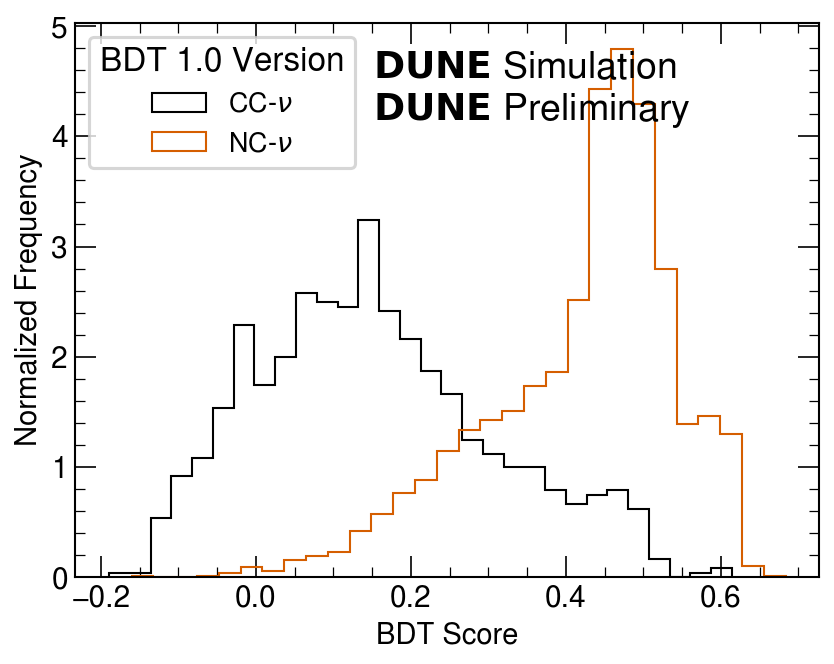

In [38]:
mask_CC_noCVN = (CCNC_Atm == 0) & (CVN_Atm == -1)
mask_NC_noCVN = (CCNC_Atm == 1) & (CVN_Atm == -1)

mask_CC = (CCNC_Atm == 0) 
mask_NC = (CCNC_Atm == 1) 

plt.figure(dpi=150)
#h1, x1, _ = plt.hist(BDTResponseAtm_grad, bins= 30,density=True, label=r'Atm-$\nu$', histtype='step', lw =1)
#h5, x5, _ = plt.hist(BDTResponseAtm_ada_oldbdt[mask_CC], bins= 30, density=False, label=r'CC-$\nu$', histtype='step', lw =1)
#h6, x6, _ = plt.hist(BDTResponseAtm_ada_oldbdt[mask_NC], bins= 30, density=False, label=r'NC-$\nu$', histtype='step', lw =1)

h5, x5, _ = plt.hist(BDTResponseAtm_ada_oldbdt[mask_CC_noCVN], bins= 30, density=True, label=r'CC-$\nu$', histtype='step', lw =1)
h6, x6, _ = plt.hist(BDTResponseAtm_ada_oldbdt[mask_NC_noCVN], bins= 30, density=True, label=r'NC-$\nu$', histtype='step', lw =1)
#h2, x2, _ = plt.hist(BDTResponse_m10_b1p1_00a_grad, bins= 30,density=True, label=r'DM $\gamma = 1.1 $', histtype='step',lw =1)
#h3, x3, _ = plt.hist(BDTResponse_m05_b1p1_ada_wcvn[CVN_b1p1_m05_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 5$ GeV', histtype='step',lw =1)
#h4, x4, _ = plt.hist(BDTResponse_m10_b1p1_ada_wcvn[CVN_b1p1_m10_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 10$ GeV', histtype='step',lw =1)
#h6, x6, _ = plt.hist(BDTResponse_m20_b1p1_ada_wcvn[CVN_b1p1_m20_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 20$ GeV', histtype='step',lw =1)
#h7, x7, _ = plt.hist(BDTResponse_m40_b1p1_ada_wcvn[CVN_b1p1_m40_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 40$ GeV', histtype='step',lw =1)
plt.xlabel('BDT Score',fontsize=14)
plt.ylabel('Normalized Frequency', fontsize=14)
dunestyle.Simulation(x=0.4,y=0.9)
dunestyle.Preliminary(x=0.4,y=0.825)
#plt.ylim(0,6)
#plt.xlim(-0.2,0.7)

plt.legend(title='BDT 1.0 Version' ,ncols=1, fontsize=13,title_fontsize=16, frameon=True)
plt.savefig('bdt_b1p1_atm_'+str(time.strftime("%Y%m%d"))+'_final.pdf', format='pdf')
plt.show()

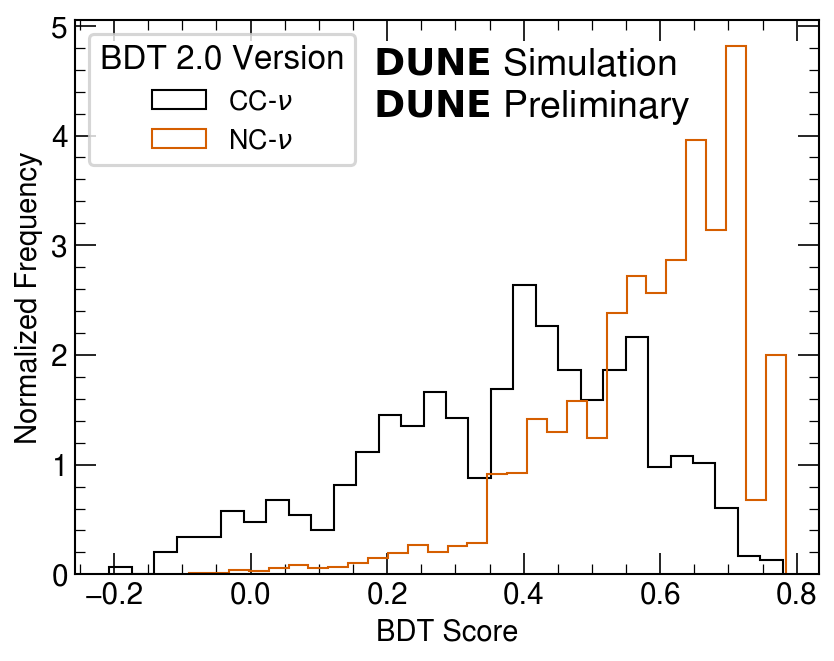

In [42]:
plt.figure(dpi=150)
#h1, x1, _ = plt.hist(BDTResponseAtm_grad, bins= 30,density=True, label=r'Atm-$\nu$', histtype='step', lw =1)
#h5, x5, _ = plt.hist(BDTResponseAtm_ada_oldbdt[mask_CC], bins= 30, density=False, label=r'CC-$\nu$', histtype='step', lw =1)
#h6, x6, _ = plt.hist(BDTResponseAtm_ada_oldbdt[mask_NC], bins= 30, density=False, label=r'NC-$\nu$', histtype='step', lw =1)

h5, x5, _ = plt.hist(BDTResponseAtm_ada_nocvn[mask_CC_noCVN], bins= 30, density=True, label=r'CC-$\nu$', histtype='step', lw =1)
h6, x6, _ = plt.hist(BDTResponseAtm_ada_nocvn[mask_NC_noCVN], bins= 30, density=True, label=r'NC-$\nu$', histtype='step', lw =1)
#h2, x2, _ = plt.hist(BDTResponse_m10_b1p1_00a_grad, bins= 30,density=True, label=r'DM $\gamma = 1.1 $', histtype='step',lw =1)
#h3, x3, _ = plt.hist(BDTResponse_m05_b1p1_ada_wcvn[CVN_b1p1_m05_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 5$ GeV', histtype='step',lw =1)
#h4, x4, _ = plt.hist(BDTResponse_m10_b1p1_ada_wcvn[CVN_b1p1_m10_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 10$ GeV', histtype='step',lw =1)
#h6, x6, _ = plt.hist(BDTResponse_m20_b1p1_ada_wcvn[CVN_b1p1_m20_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 20$ GeV', histtype='step',lw =1)
#h7, x7, _ = plt.hist(BDTResponse_m40_b1p1_ada_wcvn[CVN_b1p1_m40_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 40$ GeV', histtype='step',lw =1)
plt.xlabel('BDT Score',fontsize=14)
plt.ylabel('Normalized Frequency', fontsize=14)
dunestyle.Simulation(x=0.4,y=0.9)
dunestyle.Preliminary(x=0.4,y=0.825)
#plt.ylim(0,6)
#plt.xlim(-0.2,0.7)

plt.legend(title='BDT 2.0 Version' ,ncols=1, fontsize=13,title_fontsize=16, frameon=True)
plt.savefig('bdt_b1p1_atm_'+str(time.strftime("%Y%m%d"))+'_final.pdf', format='pdf')
plt.show()

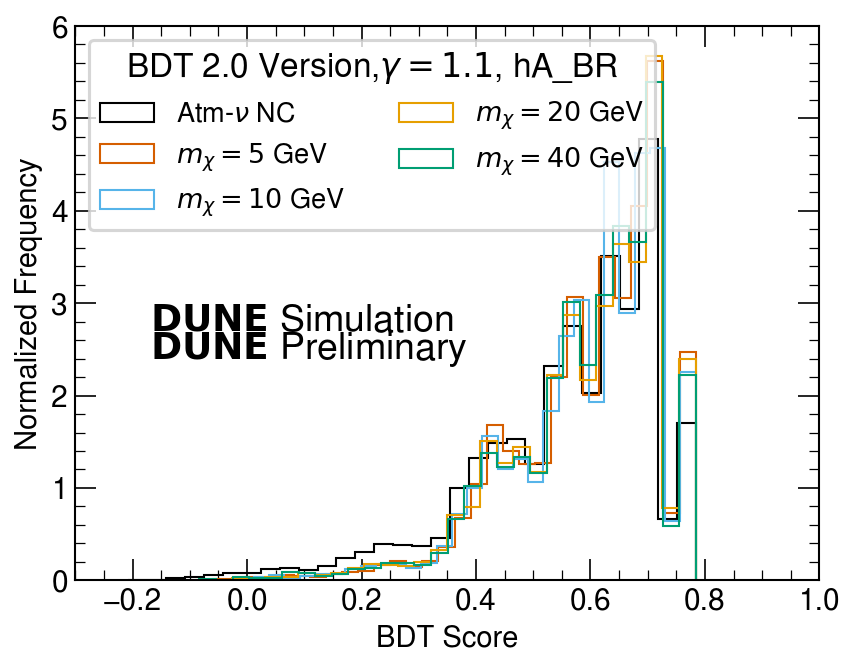

In [48]:
plt.figure(dpi=150)
#h1, x1, _ = plt.hist(BDTResponseAtm_grad, bins= 30,density=True, label=r'Atm-$\nu$', histtype='step', lw =1)
h5, x5, _ = plt.hist(BDTResponseAtm_ada_nocvn[CVN_Atm==-1], bins= 30, density=True, label=r'Atm-$\nu$ NC', histtype='step', lw =1)
#h2, x2, _ = plt.hist(BDTResponse_m10_b1p1_00a_grad, bins= 30,density=True, label=r'DM $\gamma = 1.1 $', histtype='step',lw =1)
h3, x3, _ = plt.hist(BDTResponse_m05_b1p1_ada_nocvn[CVN_b1p1_m05_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 5$ GeV', histtype='step',lw =1)
h4, x4, _ = plt.hist(BDTResponse_m10_b1p1_ada_nocvn[CVN_b1p1_m10_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 10$ GeV', histtype='step',lw =1)
h6, x6, _ = plt.hist(BDTResponse_m20_b1p1_ada_nocvn[CVN_b1p1_m20_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 20$ GeV', histtype='step',lw =1)
h7, x7, _ = plt.hist(BDTResponse_m40_b1p1_ada_nocvn [CVN_b1p1_m40_bdm==-1], bins= 30, density=True, label=r'$m_\chi = 40$ GeV', histtype='step',lw =1)
plt.xlabel('BDT Score',fontsize=14)
plt.ylabel('Normalized Frequency', fontsize=14)
dunestyle.Simulation(x=0.1,y=0.45)
dunestyle.Preliminary(x=0.1,y=0.4)
plt.ylim(0,6)
plt.xlim(-0.3,1.0)

plt.legend(title = r'BDT 2.0 Version,$\gamma = 1.1$, hA_BR',ncols=2, fontsize=13, frameon=True, title_fontsize=16)
plt.savefig('bdt_b1p1_atm_'+str(time.strftime("%Y%m%d"))+'_final.pdf', format='pdf')
plt.show()

#evts reco AtmNu = 220573, w/o CVN = 8175, ratio = 0.037
#evts reco BDM m05 = 7795, w/o CVN = 5731, ratio = 0.735
#evts reco BDM m10 = 9450, w/o CVN = 6473, ratio = 0.685
#evts reco BDM m20 = 10034, w/o CVN = 6496, ratio = 0.647
#evts reco BDM m40 = 10726, w/o CVN = 6763, ratio = 0.631


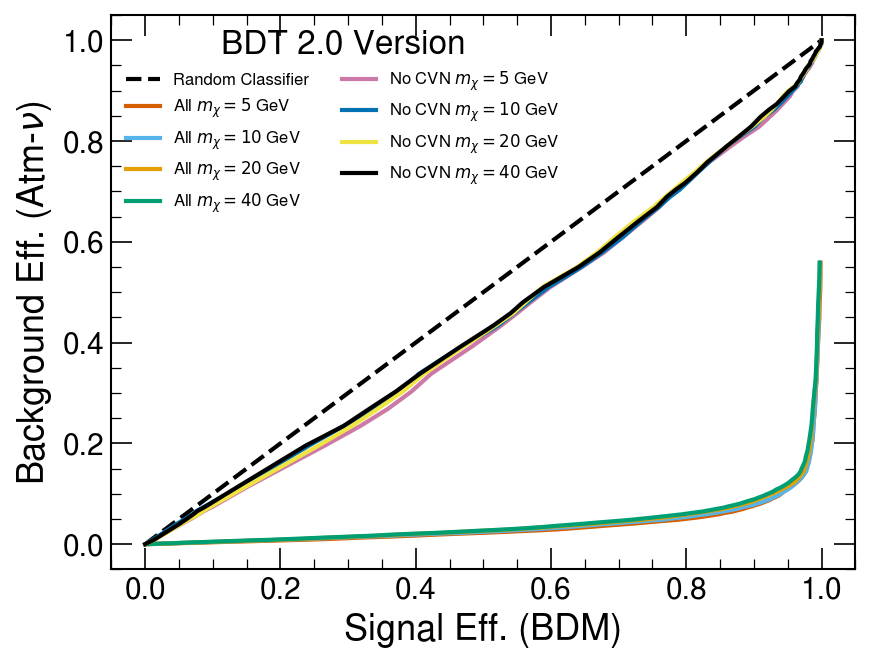

In [43]:
ATM_BDT_NOCVN=BDTResponseAtm_ada_nocvn[CVN_Atm==-1]
BDM_M10_B1P1_NOCVN=BDTResponse_m10_b1p1_ada_nocvn[CVN_b1p1_m10_bdm==-1]
BDM_M05_B1P1_NOCVN=BDTResponse_m05_b1p1_ada_nocvn[CVN_b1p1_m05_bdm==-1]
BDM_M20_B1P1_NOCVN=BDTResponse_m20_b1p1_ada_nocvn[CVN_b1p1_m20_bdm==-1]
BDM_M40_B1P1_NOCVN=BDTResponse_m40_b1p1_ada_nocvn[CVN_b1p1_m40_bdm==-1]


ATM_BDT_ALL=BDTResponseAtm_ada_nocvn    
BDM_M10_B1P1_ALL=BDTResponse_m10_b1p1_ada_nocvn
BDM_M05_B1P1_ALL=BDTResponse_m05_b1p1_ada_nocvn  
BDM_M20_B1P1_ALL=BDTResponse_m20_b1p1_ada_nocvn
BDM_M40_B1P1_ALL=BDTResponse_m40_b1p1_ada_nocvn


print(f"#evts reco AtmNu = {ATM_BDT_ALL.size}, w/o CVN = {ATM_BDT_NOCVN.size}, ratio = {ATM_BDT_NOCVN.size/ATM_BDT_ALL.size:.3f}")
print(f"#evts reco BDM m05 = {BDM_M05_B1P1_ALL.size}, w/o CVN = {BDM_M05_B1P1_NOCVN.size}, ratio = {BDM_M05_B1P1_NOCVN.size/BDM_M05_B1P1_ALL.size:.3f}")
print(f"#evts reco BDM m10 = {BDM_M10_B1P1_ALL.size}, w/o CVN = {BDM_M10_B1P1_NOCVN.size}, ratio = {BDM_M10_B1P1_NOCVN.size/BDM_M10_B1P1_ALL.size:.3f}")
print(f"#evts reco BDM m20 = {BDM_M20_B1P1_ALL.size}, w/o CVN = {BDM_M20_B1P1_NOCVN.size}, ratio = {BDM_M20_B1P1_NOCVN.size/BDM_M20_B1P1_ALL.size:.3f}")
print(f"#evts reco BDM m40 = {BDM_M40_B1P1_ALL.size}, w/o CVN = {BDM_M40_B1P1_NOCVN.size}, ratio = {BDM_M40_B1P1_NOCVN.size/BDM_M40_B1P1_ALL.size:.3f}")


atm_all_eff = []    
bdm_m10all_eff = []
bdm_m05all_eff = []
bdm_m20all_eff = []
bdm_m40all_eff = []

atm_nocvn_eff = []
bdm_m10_nocvn_eff = []
bdm_m05_nocvn_eff = []
bdm_m20_nocvn_eff = []
bdm_m40_nocvn_eff = []

for i in np.linspace(-0.2,1,100):
    #print(f"BDT Score: {i:.2f}, ATM NC Efficiency: {(ATM_BDT_NOCVN>i).sum()/ATM_BDT_NOCVN.size:.3f}, BDM m10 b1p1 Efficiency: {(BDM_M10_B1P1_NOCVN>i).sum()/BDM_M10_B1P1_NOCVN.size:.3f}")
    atm_nocvn_eff.append((ATM_BDT_NOCVN>i).sum()/ATM_BDT_NOCVN.size)
    bdm_m10_nocvn_eff.append((BDM_M10_B1P1_NOCVN>i).sum()/BDM_M10_B1P1_NOCVN.size)
    bdm_m05_nocvn_eff.append((BDM_M05_B1P1_NOCVN>i).sum()/BDM_M05_B1P1_NOCVN.size)
    bdm_m20_nocvn_eff.append((BDM_M20_B1P1_NOCVN>i).sum()/BDM_M20_B1P1_NOCVN.size)
    bdm_m40_nocvn_eff.append((BDM_M40_B1P1_NOCVN>i).sum()/BDM_M40_B1P1_NOCVN.size)
    atm_all_eff.append((ATM_BDT_ALL>i).sum()/ATM_BDT_ALL.size)
    bdm_m10all_eff.append((BDM_M10_B1P1_ALL>i).sum()/BDM_M10_B1P1_ALL.size)
    bdm_m05all_eff.append((BDM_M05_B1P1_ALL>i).sum()/BDM_M05_B1P1_ALL.size)
    bdm_m20all_eff.append((BDM_M20_B1P1_ALL>i).sum()/BDM_M20_B1P1_ALL.size)
    bdm_m40all_eff.append((BDM_M40_B1P1_ALL>i).sum()/BDM_M40_B1P1_ALL.size)

plt.figure(dpi=150)
plt.plot(np.linspace(0.0,1.0,50),np.linspace(0.0,1.0,50), ls= "--", label="Random Classifier")
plt.plot(bdm_m05all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 5$ GeV")
plt.plot(bdm_m10all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 10$ GeV")
plt.plot(bdm_m20all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 20$ GeV")
plt.plot(bdm_m40all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 40$ GeV")
plt.plot(bdm_m05_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 5$ GeV")
plt.plot(bdm_m10_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 10$ GeV")
plt.plot(bdm_m20_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 20$ GeV")
plt.plot(bdm_m40_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 40$ GeV")
plt.xlabel("Signal Eff. (BDM)")
plt.ylabel(r"Background Eff. (Atm-$\nu$)")
plt.legend(title='BDT 2.0 Version',title_fontsize=16, ncols=2, fontsize=8, frameon=False, loc="upper left")
plt.show()

#evts reco AtmNu = 220573, w/o CVN = 8175, ratio = 0.037
#evts reco BDM m05 = 7795, w/o CVN = 5731, ratio = 0.735
#evts reco BDM m10 = 9450, w/o CVN = 6473, ratio = 0.685
#evts reco BDM m20 = 10034, w/o CVN = 6496, ratio = 0.647
#evts reco BDM m40 = 10726, w/o CVN = 6763, ratio = 0.631


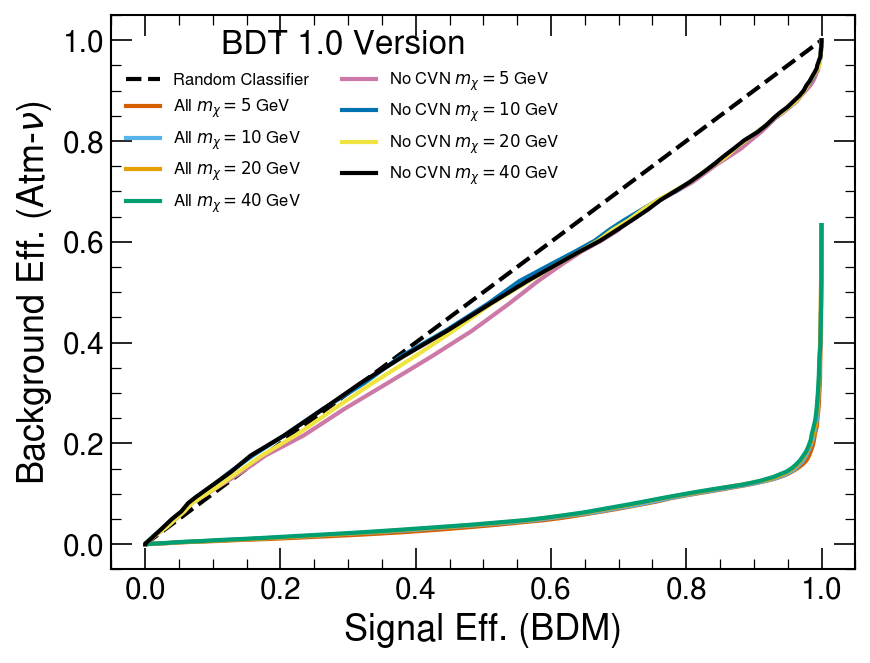

In [53]:
ATM_BDT_NOCVN=BDTResponseAtm_ada_oldbdt[CVN_Atm==-1]
BDM_M10_B1P1_NOCVN=BDTResponse_m10_b1p1_ada_oldbdt[CVN_b1p1_m10_bdm==-1]
BDM_M05_B1P1_NOCVN=BDTResponse_m05_b1p1_ada_oldbdt[CVN_b1p1_m05_bdm==-1]
BDM_M20_B1P1_NOCVN=BDTResponse_m20_b1p1_ada_oldbdt[CVN_b1p1_m20_bdm==-1]
BDM_M40_B1P1_NOCVN=BDTResponse_m40_b1p1_ada_oldbdt[CVN_b1p1_m40_bdm==-1]


ATM_BDT_ALL=BDTResponseAtm_ada_oldbdt    
BDM_M10_B1P1_ALL=BDTResponse_m10_b1p1_ada_oldbdt
BDM_M05_B1P1_ALL=BDTResponse_m05_b1p1_ada_oldbdt  
BDM_M20_B1P1_ALL=BDTResponse_m20_b1p1_ada_oldbdt
BDM_M40_B1P1_ALL=BDTResponse_m40_b1p1_ada_oldbdt


print(f"#evts reco AtmNu = {ATM_BDT_ALL.size}, w/o CVN = {ATM_BDT_NOCVN.size}, ratio = {ATM_BDT_NOCVN.size/ATM_BDT_ALL.size:.3f}")
print(f"#evts reco BDM m05 = {BDM_M05_B1P1_ALL.size}, w/o CVN = {BDM_M05_B1P1_NOCVN.size}, ratio = {BDM_M05_B1P1_NOCVN.size/BDM_M05_B1P1_ALL.size:.3f}")
print(f"#evts reco BDM m10 = {BDM_M10_B1P1_ALL.size}, w/o CVN = {BDM_M10_B1P1_NOCVN.size}, ratio = {BDM_M10_B1P1_NOCVN.size/BDM_M10_B1P1_ALL.size:.3f}")
print(f"#evts reco BDM m20 = {BDM_M20_B1P1_ALL.size}, w/o CVN = {BDM_M20_B1P1_NOCVN.size}, ratio = {BDM_M20_B1P1_NOCVN.size/BDM_M20_B1P1_ALL.size:.3f}")
print(f"#evts reco BDM m40 = {BDM_M40_B1P1_ALL.size}, w/o CVN = {BDM_M40_B1P1_NOCVN.size}, ratio = {BDM_M40_B1P1_NOCVN.size/BDM_M40_B1P1_ALL.size:.3f}")


atm_all_eff = []    
bdm_m10all_eff = []
bdm_m05all_eff = []
bdm_m20all_eff = []
bdm_m40all_eff = []

atm_nocvn_eff = []
bdm_m10_nocvn_eff = []
bdm_m05_nocvn_eff = []
bdm_m20_nocvn_eff = []
bdm_m40_nocvn_eff = []

for i in np.linspace(-0.2,1,100):
    #print(f"BDT Score: {i:.2f}, ATM NC Efficiency: {(ATM_BDT_NOCVN>i).sum()/ATM_BDT_NOCVN.size:.3f}, BDM m10 b1p1 Efficiency: {(BDM_M10_B1P1_NOCVN>i).sum()/BDM_M10_B1P1_NOCVN.size:.3f}")
    atm_nocvn_eff.append((ATM_BDT_NOCVN>i).sum()/ATM_BDT_NOCVN.size)
    bdm_m10_nocvn_eff.append((BDM_M10_B1P1_NOCVN>i).sum()/BDM_M10_B1P1_NOCVN.size)
    bdm_m05_nocvn_eff.append((BDM_M05_B1P1_NOCVN>i).sum()/BDM_M05_B1P1_NOCVN.size)
    bdm_m20_nocvn_eff.append((BDM_M20_B1P1_NOCVN>i).sum()/BDM_M20_B1P1_NOCVN.size)
    bdm_m40_nocvn_eff.append((BDM_M40_B1P1_NOCVN>i).sum()/BDM_M40_B1P1_NOCVN.size)
    atm_all_eff.append((ATM_BDT_ALL>i).sum()/ATM_BDT_ALL.size)
    bdm_m10all_eff.append((BDM_M10_B1P1_ALL>i).sum()/BDM_M10_B1P1_ALL.size)
    bdm_m05all_eff.append((BDM_M05_B1P1_ALL>i).sum()/BDM_M05_B1P1_ALL.size)
    bdm_m20all_eff.append((BDM_M20_B1P1_ALL>i).sum()/BDM_M20_B1P1_ALL.size)
    bdm_m40all_eff.append((BDM_M40_B1P1_ALL>i).sum()/BDM_M40_B1P1_ALL.size)

plt.figure(dpi=150)
plt.plot(np.linspace(0.0,1.0,50),np.linspace(0.0,1.0,50), ls= "--", label="Random Classifier")
plt.plot(bdm_m05all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 5$ GeV")
plt.plot(bdm_m10all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 10$ GeV")
plt.plot(bdm_m20all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 20$ GeV")
plt.plot(bdm_m40all_eff, np.array(atm_all_eff), label=r"All $m_\chi = 40$ GeV")
plt.plot(bdm_m05_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 5$ GeV")
plt.plot(bdm_m10_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 10$ GeV")
plt.plot(bdm_m20_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 20$ GeV")
plt.plot(bdm_m40_nocvn_eff, np.array(atm_nocvn_eff), label=r"No CVN $m_\chi = 40$ GeV")
plt.xlabel("Signal Eff. (BDM)")
plt.ylabel(r"Background Eff. (Atm-$\nu$)")
plt.legend(title='BDT 1.0 Version',title_fontsize=16, ncols=2, fontsize=8, frameon=False, loc="upper left")
plt.show()